# Analysing NY High School Data

Investigating the relationship between demographics and performance in high schools is an interesting angle to take to discover the efficacy of standardised tests. NYC has a significant immigrant population, comparing factors such as race, income and gender with SAT performance is a good way to find whether the SAT system is a fair test. For example if a demographic group performs better than others, we would have some evidence that the SAT system is possibly not fair.

Data on New York City high schools is publicly available through [NYCOpenData](https://opendata.cityofnewyork.us/), as well as the demographics of each high school.

Several data files were sourced:
- *ap_2010.csv* - Advanced Placement exam reults for each high school (passing an optional AP exam can earn a student college credit in that subject)
- *class_size.csv* - Information on class size for each school
- *demographics.csv* - Information on school demographics
- *graduation.csv* - Percentage of students who graduated for each school
- *sat_results.csv* - SAT scores by school
- *high_school_directory.csv* - Directory of NY high schools
- *survey_ny.txt* - Data on school surveys from all schools
- *survey_d75.txt* - Data on school surveys from NY District 75

The data has been cleaned and aggregated into a single csv file in order for analysis to take place.

### Read in the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
data = pd.read_csv('clean_data.csv')
data.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260,1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041,1
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673,1
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426,1


### Exploring Correlations with SAT Scores

First lets explore the correlation between the factors and sat_score. Some observations:

- *total_enrollment* has a positive correlation with *sat_score*. You would expect smaller schools where students can receive more attention to perform better, but this implies the opposite. Other columns that are indicators of *total_enrollment* imply the same such as *total_students*, *AP Test Takers* and *Total Exams Taken*.

- *female_per* (percentage of females) and *female_num* (number of females) both correlate positively with *sat_score*. *male_per* correlates negatively.

- Teacher and student ratings of school safety (*saf_t_11* and *saf_s_11*) correlate with *sat_score*.

- There is significatn racial inequality in SAT scores (*white_per*, *asian_per*, *black_per*, *hispanic_per*).

- Percentage of English language learners at the school (*ell_percent* and *frl_percent*) has a strong negative correlation with SAT scores.

In [4]:
pd.set_option('display.max_rows', 500)
# filter correlations by columns mentioned
cols = ['total_enrollment',
        'total_students',
        'AP Test Takers ',
        'Total Exams Taken',
        'female_per',
        'female_num',
        'male_per',
        'white_per',
        'asian_per',
        'black_per',
        'hispanic_per',
        'ell_percent',
        'frl_percent']

# calculate and show relevant correlations with sat_score
data.corr()['sat_score'].sort_values(ascending=False)[cols]

total_enrollment     0.367857
total_students       0.407827
AP Test Takers       0.523140
Total Exams Taken    0.514333
female_per           0.112108
female_num           0.388631
male_per            -0.112062
white_per            0.620718
asian_per            0.570730
black_per           -0.284139
hispanic_per        -0.396985
ell_percent         -0.398750
frl_percent         -0.722225
Name: sat_score, dtype: float64

### Exploring Total Enrollment and SAT Score

First we will explore the effect of total enrollment on SAT score, as this was an unexpected finding.

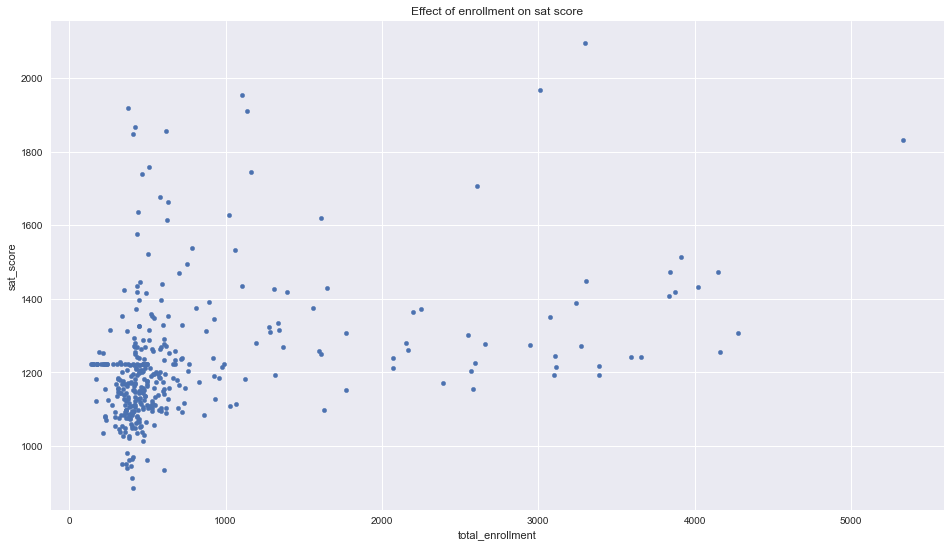

In [5]:
data.plot.scatter(x='total_enrollment', y='sat_score', title='Effect of enrollment on sat score')

From the scatterplot it doesn't look like theres a strong correlation between *sat_score* and *total_enrollment*.

There is a large cluster of points where both *total_enrollment* and *sat_score* are low however.

In [6]:
# filter data where enrollment is < 1000
low_enrollment = data[(data['total_enrollment'] < 1000) & (data['sat_score'] < 1000)]

# print school names for low enrollment
low_enrollment['School Name'].unique()

array(['INTERNATIONAL COMMUNITY HIGH SCHOOL', '0',
       'BRONX INTERNATIONAL HIGH SCHOOL',
       'KINGSBRIDGE INTERNATIONAL HIGH SCHOOL',
       'INTERNATIONAL SCHOOL FOR LIBERAL ARTS',
       'HIGH SCHOOL OF WORLD CULTURES',
       'BROOKLYN INTERNATIONAL HIGH SCHOOL',
       'INTERNATIONAL HIGH SCHOOL AT PROSPECT',
       'IT TAKES A VILLAGE ACADEMY', 'MULTICULTURAL HIGH SCHOOL',
       'PAN AMERICAN INTERNATIONAL HIGH SCHOO'], dtype=object)

After searching Google and Wikipedia, it was discovered that most of these schools have a high percentage of English learners (high migrant population). An example can be found [here](https://en.wikipedia.org/wiki/Walton_High_School_(Bronx)).

This implies that it is actually *ell_percent* that correlates strongly with *sat_score*.

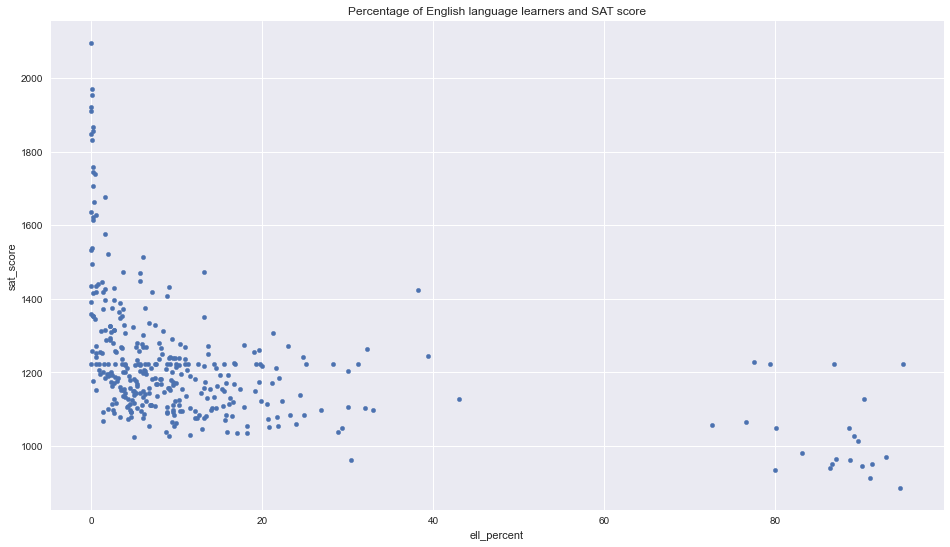

In [7]:
data.plot.scatter(x='ell_percent', y='sat_score', title='Percentage of English language learners and SAT score')

As expected, there is a much stronger correlation between *ell_percent* and *sat_score*. Schools with low enrollment often have a higher proportion of English language learners, correlating negatively with SAT performance.

### Investigating Survey Results

Earlier, we found that there was a strong correlation between teacher and student perceptions of safety and SAT scores. Lets investigate the survey results further, and see which schools have lower safety scores.

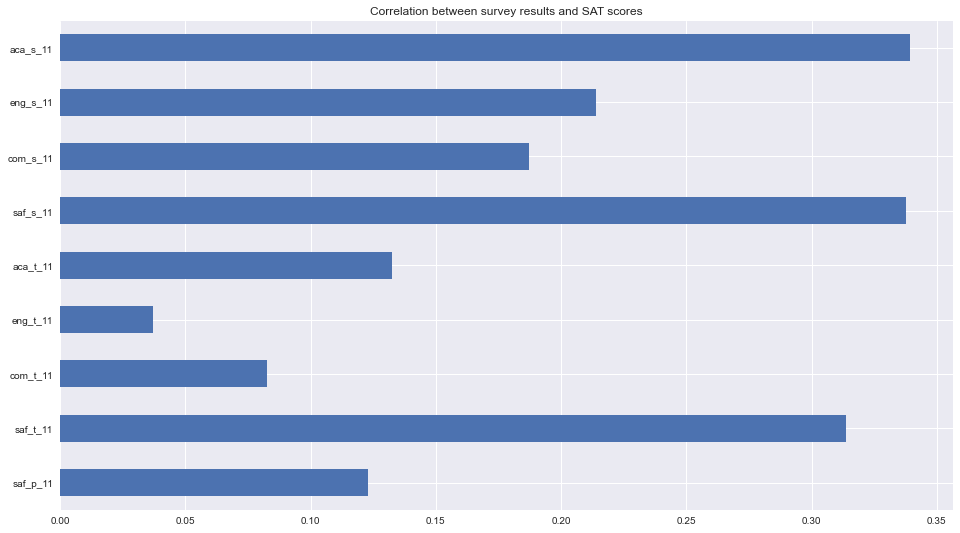

In [8]:
# list of survey cols
survey_reps = ['saf_p_11',
               'saf_t_11',
               'com_t_11',
               'eng_t_11',
               'aca_t_11',
               'saf_s_11',
               'com_s_11',
               'eng_s_11',
               'aca_s_11'
              ]

# compute correlation between survey results and sat_score
survey_corr = data.corr()['sat_score'].loc[survey_reps]

# plot bar graph of correlations
survey_corr.plot.barh(title='Correlation between survey results and SAT scores')

As mentioned previously, there is a strong correlation between safety scores and SAT performance. In addition, there seems to be a strong positive correlation between student academic expectations and SAT scores.

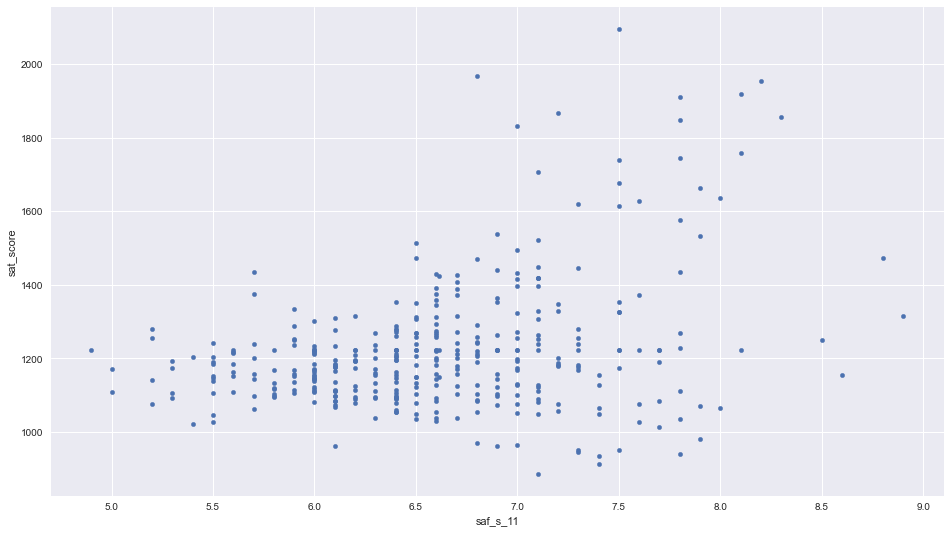

In [9]:
data.plot.scatter(y='sat_score', x='saf_s_11')

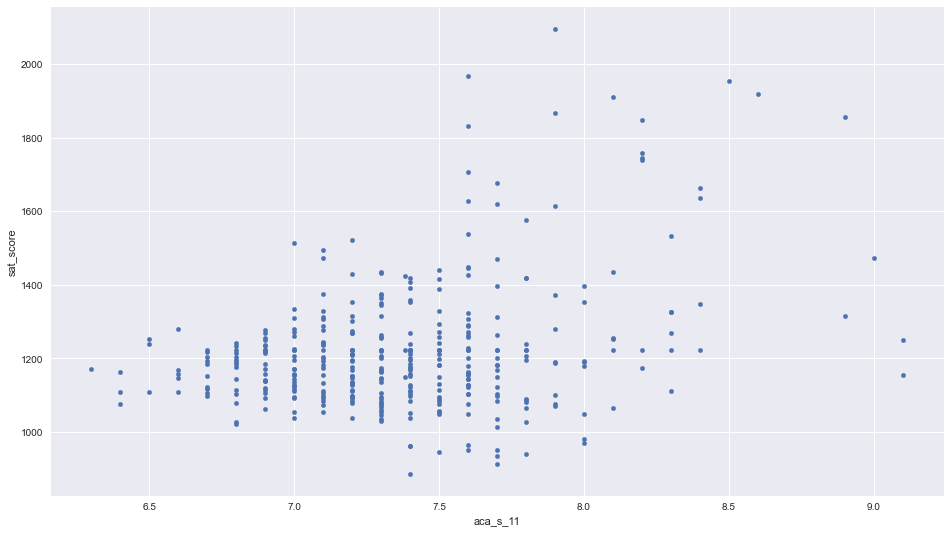

In [10]:
data.plot.scatter(y='sat_score', x='aca_s_11')

Further evidence that an increase in safety perceptions and academic expectations from students results in better academic performances.

### Investigating Safety Scores by Borough

It would be interesting to see how the average safety score varies from borough to borough, and how this affects student performance.

In [11]:
def boro_extract(string):
    """Returns string of school borough based on DBN code
    Args:
        string (str): DBN identifier
    Returns:
        str: string of school borough
    """
    # Extract character equivalent to school borough in DBN
    boro_char = string[2]
    
    # Return equivalent school borough name
    if boro_char == 'M':
        return 'Manhattan'
    elif boro_char == 'Q':
        return 'Queens'
    elif boro_char == 'K':
        return 'Brooklyn'
    elif boro_char == 'X':
        return 'Bronx'
    elif boro_char == 'R':
        return 'Staten Island'

# apply boro-extract over DBN col and create boro col
data['boro'] = data['DBN'].apply(boro_extract)

In [12]:
# compute average safety and sat scores by borough
safety = data.groupby('boro').agg(np.mean)[['saf_s_11', 'sat_score']]
safety.sort_values(by='saf_s_11', ascending=False)

,saf_s_11,sat_score
boro,,
Manhattan,6.831370,1278.331410
Queens,6.721875,1286.753032
Bronx,6.606577,1157.598203
Staten Island,6.530000,1382.500000
Brooklyn,6.370755,1181.364461


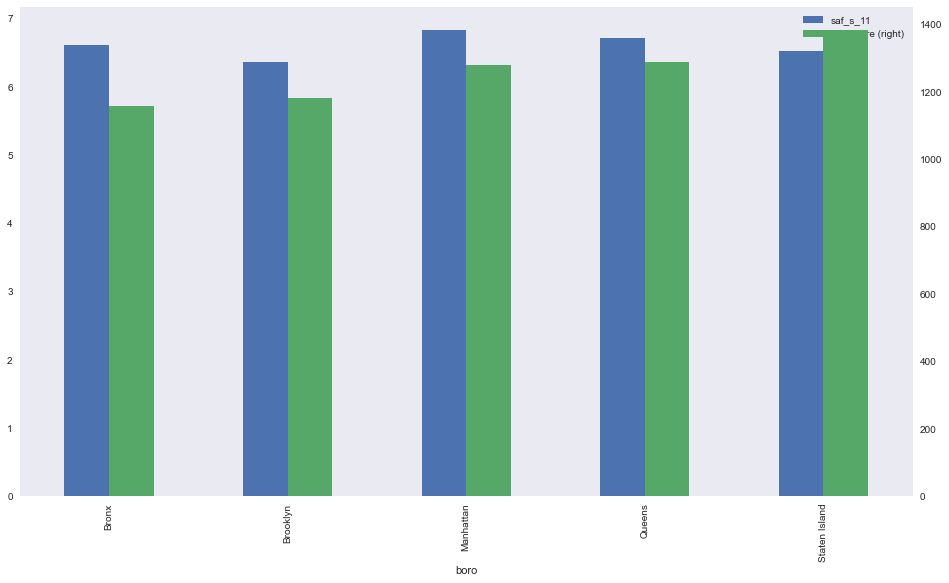

In [13]:
ax = safety.plot.bar(secondary_y='sat_score')
ax.grid(False)
ax.right_ax.grid(False)

In general, the better the student safety score the better sat scores. Staten Island however breaks this trend having the second lowest safety score but best SAT score.

### Investigating Effect of Race

By plotting the correlations between ethnicity percentages and sat score we can determine some preliminary information about how fair the SAT system is across the board.

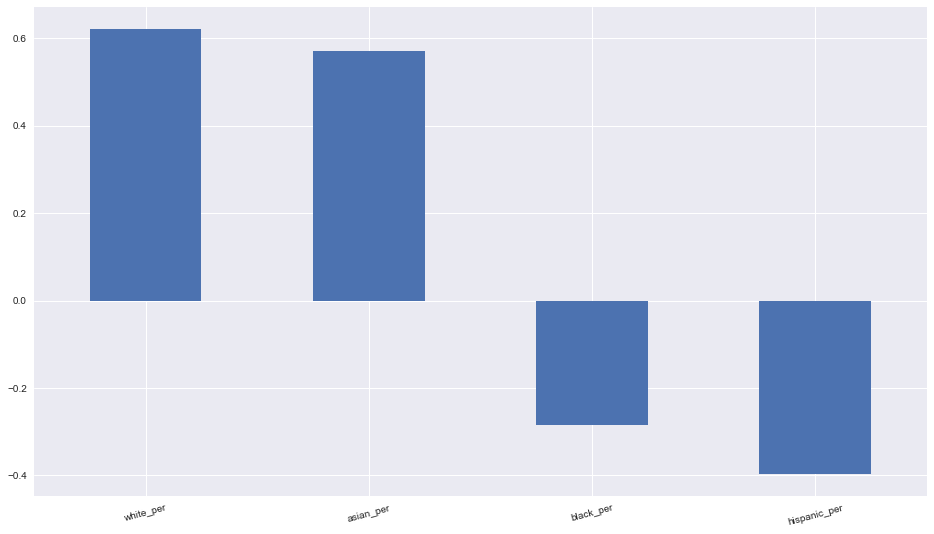

In [14]:
# list of race percentages
races = ['white_per',
         'asian_per',
         'black_per',
         'hispanic_per']

# comput correlation between sat_score and race percentage
data.corr()['sat_score'][races].plot.bar(rot=15)

The graph implies that the SAT system is not demographically fair, with *white_per* having a strong positive correlation with *sat_score* and *hispanic_per* having a strong negative correlation.

It implies that classes with a greater proportion of white and asian students will perform better than classes with a greater proportion of black and hispanic students.

NY has a large hispanic migrant population, so it would be interesting to investigate this demographic further.

In [15]:
# filter the data for schools with a high proportion of hispanic students
high_hispanics = data[data['hispanic_per'] > 95]
high_hispanics[['SCHOOL NAME', 'sat_score']]

,SCHOOL NAME,sat_score
44,MANHATTAN BRIDGES HIGH SCHOOL,1058.0
82,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,1174.0
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,1014.0
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,951.0
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,934.0
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,970.0
253,MULTICULTURAL HIGH SCHOOL,887.0
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,951.0


After searching the internet, these schools appear to be aimed toward recent immigrants. These schools also have a high percentage of english language learners which would further explain their low sat scores.

### Investigating Gender Differences

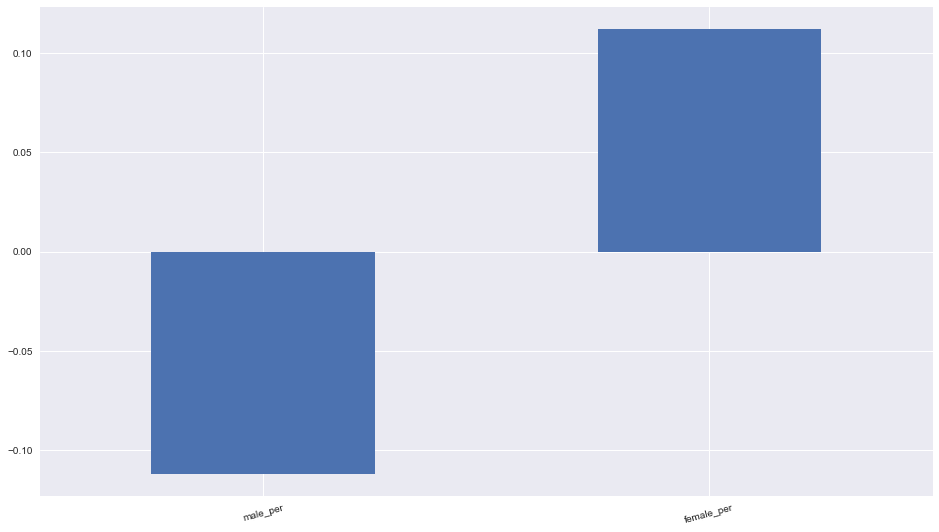

In [16]:
# plot correlation between gender proportion and sat scores
gender = ['male_per', 'female_per']
data.corr()['sat_score'][gender].plot.bar(rot=15)

*female_per* correlates positively with *sat_score* whereas *male_per* correlates negatively.

In [17]:
# filter to schools with high female proportions and high sat scores
data[(data['female_per'] > 60) & (data['sat_score'] > 1700)]['SCHOOL NAME']

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Researching the schools listed above again appear to be very selective independent schools with high academic expectations and entrance exams. This may skew the data.

### Investigating AP Scores and SAT Scores

Advanced Placement exams are optional exams that can be taken by students to earn college credit in a particular subject, if they perform well.

In [18]:
# calculate percentage of ap test takers per school
data['ap_per'] = data['AP Test Takers '] / data['total_enrollment']

In [19]:
ap_boro = data.groupby('boro').agg(np.mean)[['ap_per','sat_score']]
ap_boro.sort_values(by='ap_per', ascending=False)

,ap_per,sat_score
boro,,
Manhattan,0.246578,1278.331410
Brooklyn,0.217670,1181.364461
Bronx,0.189331,1157.598203
Queens,0.184006,1286.753032
Staten Island,0.176337,1382.500000


Generally, the greater the percentage of AP test takers the better the SAT score. Staten Island again breaks this trend however.

### Investigating Performance by Borough and Borough Property Price

It would be interesting to find a relationship between average property price in a borough and the corresponding performance of schools in that area. To do this a dataset of NYC property sales by borough was sourced from Kaggle [here](https://www.kaggle.com/new-york-city/nyc-property-sales).

In [20]:
# read in the property sale data to dataframe
property_sale = pd.read_csv('nyc-rolling-sales.csv')
property_sale.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [21]:
# convert dataframe cols to lowercase
property_sale.columns = map(str.lower, property_sale.columns)

In [22]:
# drop irrelevant cols
cols = ['borough',
        'neighborhood',
        'sale price',
        ]

property_sale = property_sale[cols]

In [23]:
# map borough code to name
mapper = {1: 'Manhattan',
          2: 'Bronx',
          3: 'Brooklyn',
          4: 'Queens',
          5: 'Staten Island'}

property_sale['borough'] = property_sale['borough'].map(mapper)

In [24]:
# convert sale prices to numeric
property_sale['sale price'] = pd.to_numeric(property_sale['sale price'], errors='coerce')

In [25]:
# calculate average property price by borough
boro_avg_property = property_sale.groupby('borough').agg(np.mean)['sale price']

In [26]:
# rename axis for merging
boro_avg_property.rename_axis('boro', inplace=True)

In [27]:
# calculate average sat score by borough
boro_sat_score = data.groupby('boro').agg(np.mean)['sat_score']

In [28]:
# merge the datasets
boro_sat_price = pd.merge(boro_avg_property, boro_sat_score, on='boro')
boro_sat_price.sort_values(by='sat_score', ascending=False)

,sale price,sat_score
boro,,
Staten Island,5.434721e+05,1382.500000
Queens,7.399086e+05,1286.753032
Manhattan,3.337951e+06,1278.331410
Brooklyn,8.344884e+05,1181.364461
Bronx,5.901936e+05,1157.598203


From the table it can be seen that Staten Island has the second cheapest property prices and the best SAT performances. This borough is possibly the best area to buy affordable housing and offer children a good education. Brooklyn has the most expensive property prices but the second worst performing schools.